<h1>B09705039_劉惟恩_HW06

In [1]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 120

<h2>Problem 19.16

In [2]:
# 讀取資料集
df1 = pd.read_excel('Xr19-16.xlsx')

print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

x1 = df1["Day"]
x2 = df1["Night"].dropna()

Head of dataset:


,Day,Night
0,2,2.0
1,4,2.0
2,2,2.0
3,4,4.0
4,1,3.0


Tail of dataset:


,Day,Night
177,3,NaN
178,4,NaN
179,4,NaN
180,3,NaN
181,3,NaN


Check Normality Assumption

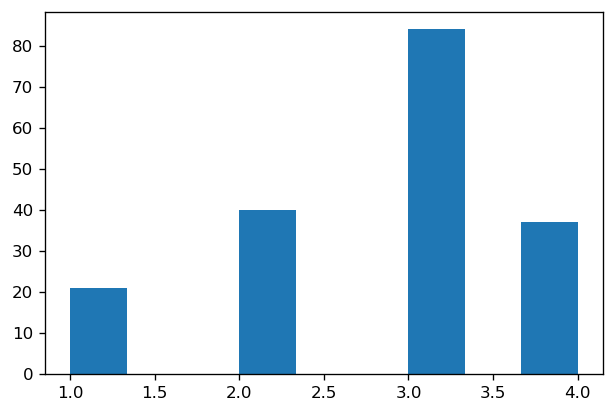

In [3]:
_ = plt.hist(x1, bins='auto')

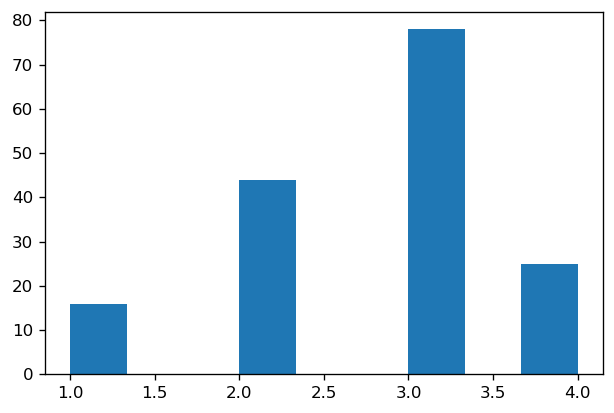

In [4]:
_ = plt.hist(x2, bins='auto')

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


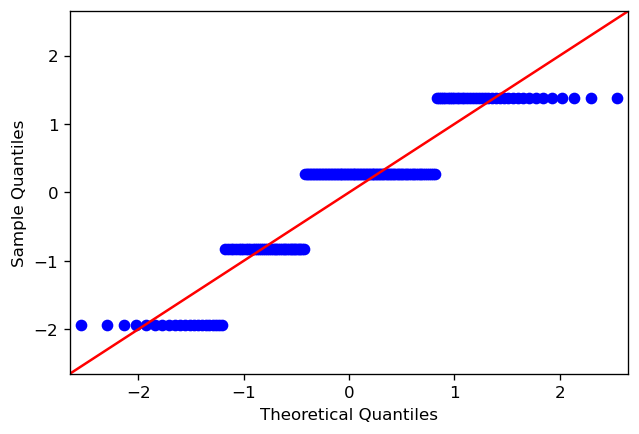

In [5]:
fig = sm.qqplot(x1, stats.norm, fit=True, line='45')

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


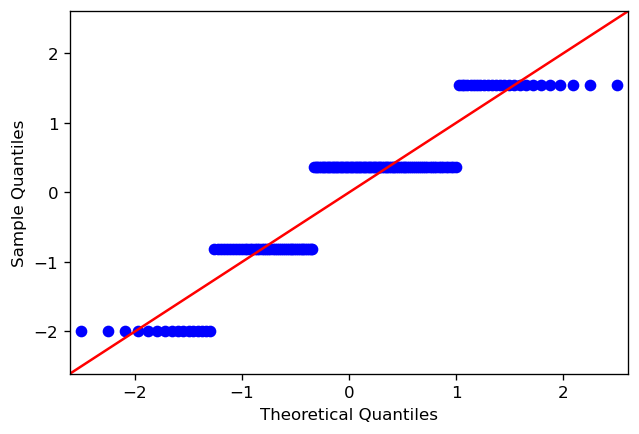

In [6]:
fig = sm.qqplot(x2, stats.norm, fit=True, line='45')

In [7]:
stat, p = stats.shapiro(x1)
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.860, p=0.0000


The p-value of Shapiro-Wilks test is 0.0000, which indicates that the null hypothesis is rejected. As a result, there is strong evidence showing that the distribution is not normally distributed.

In [8]:
stat, p = stats.shapiro(x2)
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.862, p=0.0000


The p-value of Shapiro-Wilks test is 0.0000, which indicates that the null hypothesis is rejected. As a result, there is strong evidence showing that the distribution is not normally distributed.

It is not normally distributed.
Use wilcoxon rank sum test.

Hypotheses:<br>
$H_0$: The locations of the two populations are the same.<br>
$H_1$: The locations of the two populations are not the same.

In [9]:
stats.mannwhitneyu(x1, x2, alternative='two-sided')

MannwhitneyuResult(statistic=15572.5, pvalue=0.392990186062222)

Since the p-value = 0.392990186062222 > 0.05, we cannot reject $H_0$.<br>
Thus, we cannot infer that night shift customers rate the service differently than the day shift.

<h2>Problem 19.45

In [10]:
# 讀取資料集
df1 = pd.read_excel('Xr19-45.xlsx')

print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,European,American
0,28,53
1,24,6
2,95,53
3,28,24
4,24,6


Tail of dataset:


,European,American
20,53,24
21,28,28
22,28,53
23,95,24
24,95,28


<h3>(a)

The data are large sample match-pairs.
Use Sign Test. 

$H_0$: The two population locations are the same.<br>
$H_1$: The location of population 1 (European car rating) is to the right of the location of population 2 (North American car rating).

In [11]:
import math

arry = df1["European"] - df1["American"]

neg = 0
pos = 0
for i in arry:
    if i < 0:
        neg += 1
    if i > 0:
        pos += 1
n = pos + neg

z = (pos - 0.5 * n) / (0.5 * math.sqrt(n))
pvalue = 1 - stats.norm.cdf(z)
print(f"p-value = {pvalue:.4f}")

p-value = 0.0109


Since the p-value = 0.0109 > 0.05, we reject $H_0$ in favor of $H_1$.<br>
Thus, we can conclude that the European car is perceived to be more comfortable than the North American car.

<h3>(b)

They have the exact same responses and data.<br>
The respones are sorted in increasing order only with different numbers, so it won't influence the sign of each paired differences.
The amount of positive and negative signs will be the same.<br>
Thus, the z value and the p value will be exactly the same as problem 4. The results are identical.

<h2>Problem 19.56

In [12]:
# 讀取資料集
df1 = pd.read_excel('Xr19-56.xlsx')

print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,High School 1,High School 2
0,2,3
1,4,3
2,3,2
3,3,3
4,3,3


Tail of dataset:


,High School 1,High School 2
95,4,4
96,2,1
97,3,3
98,2,3
99,1,1


Check Normality Assumption

In [13]:
df1['diff'] = df1['High School 1'] - df1['High School 2']

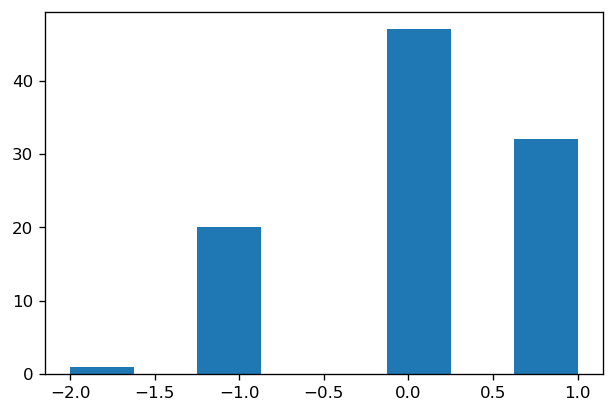

In [14]:
_ = plt.hist(df1['diff'], bins='auto')

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


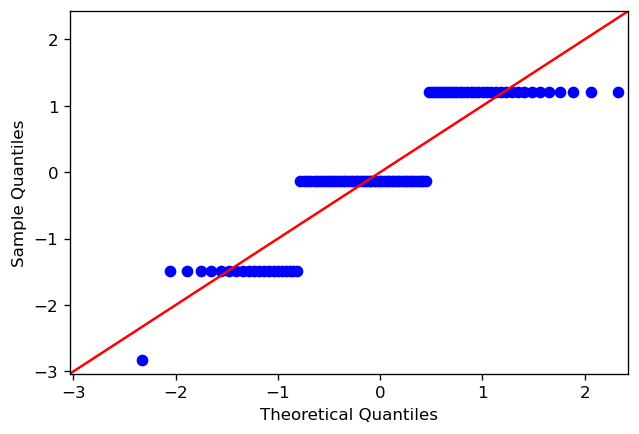

In [15]:
fig = sm.qqplot(df1['diff'], stats.norm, fit=True, line='45')

In [16]:
stat, p = stats.shapiro(df1['diff'])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.8234, p=0.0000


The p-value of Shapiro-Wilks test is 0.0000, which indicates that the null hypothesis is rejected. As a result, there is strong evidence showing that the distribution is not normally distributed.

It is not normally distributed.
Use Wilcoxon Signed Rank Sum Test.

Hypotheses:<br>
$H_0$: The locations of the two populations are the same.<br>
$H_1$: The location of population 1 (high school 1) is to the right of the location of population 2 (high school 2).

In [17]:
stats.wilcoxon(df1['High School 1'], df1['High School 2'], 
               alternative='greater')

WilcoxonResult(statistic=848.0, pvalue=0.09072460386071024)

The p-value is 0.09072460386071024, which is greater than the 0.05 significance level, we cannot reject $H_0$. Thus, there is no evidence showing that preference in admissions should be given to the student from high school 1.